In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
internet = pd.read_csv(r"C:\Users\yeshw\Downloads\internet.csv")
broadband = pd.read_csv(r"C:\Users\yeshw\Downloads\broadband.csv")
people = pd.read_csv(r"C:\Users\yeshw\Downloads\people.csv")
print(people.head())
print("-----------------------------")
print(internet.head())
print("-----------------------------")
print(broadband.head())

        Entity Code  Year  Users
0  Afghanistan  AFG  1990      0
1  Afghanistan  AFG  1991      0
2  Afghanistan  AFG  1992      0
3  Afghanistan  AFG  1993      0
4  Afghanistan  AFG  1994      0
-----------------------------
        Entity Code  Year  Internet_Usage
0  Afghanistan  AFG  1990             0.0
1  Afghanistan  AFG  1991             0.0
2  Afghanistan  AFG  1992             0.0
3  Afghanistan  AFG  1993             0.0
4  Afghanistan  AFG  1994             0.0
-----------------------------
        Entity Code  Year  Broadband_Subscriptions
0  Afghanistan  AFG  2004                 0.000809
1  Afghanistan  AFG  2005                 0.000858
2  Afghanistan  AFG  2006                 0.001892
3  Afghanistan  AFG  2007                 0.001845
4  Afghanistan  AFG  2008                 0.001804


### What are the top 5 countries with the highest internet use (by population share)?

In [26]:
internet_2019 = internet[internet['Year'] == 2019]
total_usage = internet_2019.groupby(['Entity','Year'])['Internet_Usage'].sum().sort_values(ascending = False).reset_index(name = 'population_share')
top_5_usage = (total_usage.head(5))
display(top_5_usage)

,Entity,Year,population_share
0,Bahrain,2019,99.701504
1,Qatar,2019,99.652804
2,Kuwait,2019,99.542676
3,United Arab Emirates,2019,99.149998
4,Denmark,2019,98.046435


### How many people had internet access in those countries in 2019?

In [28]:
people_2019 = people[(people['Year'] == 2019) & (people['Entity'].isin(['Bahrain','Qatar','Kuwait','United Arab Emirates','Denmark']))] 
access_2019 = (people_2019.loc[:, ['Entity', 'Users']]).reset_index()
display(access_2019)

,index,Entity,Users
0,477,Bahrain,1489735
1,1565,Denmark,5682653
2,3091,Kuwait,4420795
3,4728,Qatar,2797495
4,5986,United Arab Emirates,9133361


### What are the top 5 countries with the highest internet use for each of the following regions:  'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia'?

In [30]:
new = internet.dropna(axis = 0, subset = ('Code'))
df1 = pd.read_html('https://statisticstimes.com/geography/countries-by-continents.php', thousands=None, decimal=',')
may = pd.DataFrame(df1[2])
region = (may.loc[:,['ISO-alpha3 Code','Region 1','Continent']])
region_f = new.merge(region, left_on = 'Code', right_on = 'ISO-alpha3 Code')
region_2019 = region_f[region_f['Year'] == 2017].reset_index()
display(region_2019.head())

,index,Entity,Code,Year,Internet_Usage,ISO-alpha3 Code,Region 1,Continent
0,21,Afghanistan,AFG,2017,11.447688,AFG,Southern Asia,Asia
1,49,Albania,ALB,2017,71.847041,ALB,Southern Europe,Europe
2,78,Algeria,DZA,2017,47.691055,DZA,Northern Africa,Africa
3,112,Andorra,AND,2017,91.567467,AND,Southern Europe,Europe
4,192,Argentina,ARG,2017,74.294907,ARG,South America,South America


### top 5 countries with the highest internet use for Middle East & North Africa

In [37]:
me_na = region_2019[region_2019['Region 1'].isin(['Western Asia','Northern Africa'])]
top_me_na = me_na.sort_values('Internet_Usage', ascending = False)
display(top_me_na.loc[:,['Entity', 'Internet_Usage']].head(5))

,Entity,Internet_Usage
93,Kuwait,97.999989
142,Qatar,97.388849
11,Bahrain,95.878136
183,United Arab Emirates,94.819923
151,Saudi Arabia,94.175600


 ### top 5 countries with the highest internet use for 'Latin America & Caribbean'

In [40]:
la_c = region_2019[region_2019['Region 1'].isin(['Caribbean','South America','Central America',])]
top_la_a = la_c.sort_values('Internet_Usage', ascending = False)
display(top_la_a.loc[:,['Entity', 'Internet_Usage']].head(5).reset_index(drop = True))

,Entity,Internet_Usage
0,Aruba,97.170000
1,Bahamas,85.000000
2,Chile,82.327487
3,Barbados,81.760778
4,Cayman Islands,81.067693


 ### top 5 countries with the highest internet use for 'East Asia & Pacific'

In [41]:
ea_p = region_2019[(region_2019['Region 1'] == 'Eastern Asia') | (region_2019['Continent'] == 'Oceania')]
top_ea_p = ea_p.sort_values('Internet_Usage', ascending = False)
display(top_ea_p.loc[:,['Entity', 'Internet_Usage']].head(5).reset_index(drop = True))

,Entity,Internet_Usage
0,South Korea,95.069422
1,Japan,91.726547
2,New Zealand,90.811093
3,Hong Kong,89.415945
4,Australia,86.545049


 ### top 5 countries with the highest internet use for 'South Asia'

In [42]:
sa = region_2019[region_2019['Region 1'] == 'Southern Asia']
top_sa = sa.sort_values('Internet_Usage', ascending = False)
display(top_sa.loc[:,['Entity', 'Internet_Usage']].head(5).reset_index(drop = True))

,Entity,Internet_Usage
0,Iran,64.043974
1,Maldives,63.185666
2,Sri Lanka,34.113348
3,India,32.000000
4,Nepal,21.403510


 ### top 5 countries with the highest internet use for 'North America'

In [43]:
na = region_2019[region_2019['Region 1'] == 'Northern America']
top_na = na.sort_values('Internet_Usage', ascending = False)
display(top_na.loc[:,['Entity', 'Internet_Usage']].head(5).reset_index(drop = True))

,Entity,Internet_Usage
0,Bermuda,98.370000
1,Canada,92.701372
2,United States,87.274889
3,Greenland,69.482462


 ### top 5 countries with the highest internet use for 'Europe & Central Asia'

In [44]:
e_ca = region_2019[(region_2019['Region 1'] == 'Central Asia') | (region_2019['Continent'] == 'Europe')]
top_e_ca = e_ca.sort_values('Internet_Usage', ascending = False)
display(top_e_ca.loc[:,['Entity', 'Internet_Usage']].head(5).reset_index(drop = True))

,Entity,Internet_Usage
0,Liechtenstein,99.546612
1,Iceland,98.255201
2,Faeroe Islands,97.581959
3,Luxembourg,97.362960
4,Denmark,97.099362


### visualization of the five regions' internet usage over time

In [12]:

africa = region_f[region_f['Region 1'].isin(['Western Asia','Northern Africa'])].groupby('Year')['Internet_Usage'].sum()
latin = region_f[region_f['Region 1'].isin(['Caribbean','South America','Central America',])].groupby('Year')['Internet_Usage'].sum()
ea = region_f[(region_f['Region 1'] == 'Eastern Asia') | (region_2019['Continent'] == 'Oceania')].groupby('Year')['Internet_Usage'].sum()
south = region_f[region_f['Region 1'] == 'Southern Asia'].groupby('Year')['Internet_Usage'].sum()
north = region_f[region_f['Region 1'] == 'Northern America'].groupby('Year')['Internet_Usage'].sum()
europe = region_f[(region_f['Region 1'] == 'Central Asia') | (region_2019['Continent'] == 'Europe')].groupby('Year')['Internet_Usage'].sum()


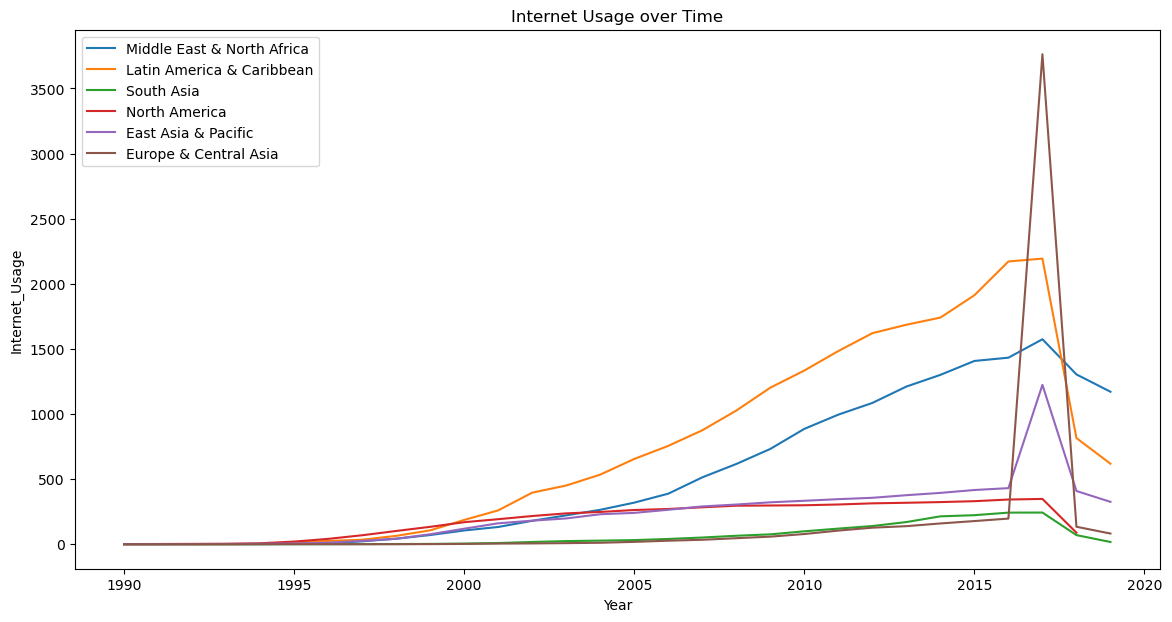

In [46]:
plt.figure(figsize=(14,7))
sns.lineplot(data = africa[africa.index < 2020], label = 'Middle East & North Africa')
sns.lineplot(data = latin[latin.index < 2020], label = 'Latin America & Caribbean')
sns.lineplot(data = south[south.index < 2020], label = 'South Asia')
sns.lineplot(data = north[north.index < 2020], label = 'North America')
sns.lineplot(data = ea[ea.index < 2020], label = 'East Asia & Pacific')
sns.lineplot(data = europe[europe.index < 2020], label = 'Europe & Central Asia')
plt.title('Internet Usage over Time')
plt.legend()
plt.show()

### What are the 5 countries with the most internet users?

In [47]:
most_users = people[people['Year'] == 2019].sort_values('Users', ascending = False).dropna().iloc[1:].head(5)
display(most_users.reset_index(drop = True))

,Entity,Code,Year,Users
0,China,CHN,2019,911554782
1,India,IND,2019,406634942
2,United States,USA,2019,298983035
3,Brazil,BRA,2019,156533889
4,Indonesia,IDN,2019,128565820


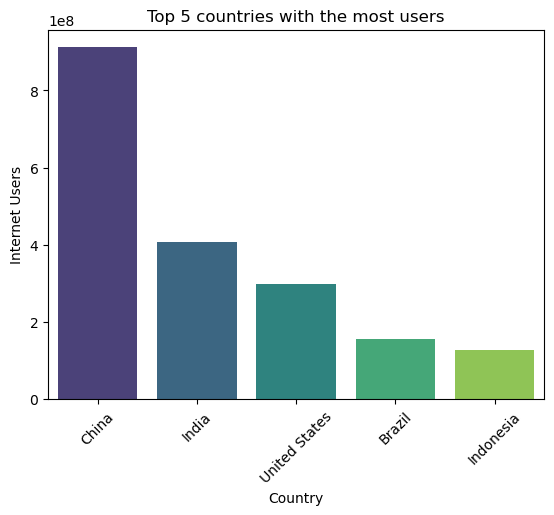

In [15]:
sns.barplot( x = most_users['Entity'], y = most_users['Users'], data = most_users, palette = 'viridis' )
plt.xlabel('Country')
plt.ylabel('Internet Users')
plt.title('Top 5 countries with the most users')
plt.xticks(rotation = 45)

plt.show()

### correlation between internet usage (population share) and broadband subscriptions for 2019

In [16]:
int_broad = internet.merge(broadband, on = ['Code','Year'])
int_broad_2019 = int_broad[int_broad['Year'] == 2019]
int_broad_2019 = int_broad_2019.drop_duplicates(subset = ['Entity_x'])
corr = (int_broad_2019['Internet_Usage'].corr(int_broad_2019['Broadband_Subscriptions']))
print(f" correlation between internet usage (population share) and broadband subscriptions for 2019 is {round(corr,2)}")

 correlation between internet usage (population share) and broadband subscriptions for 2019 is 0.56


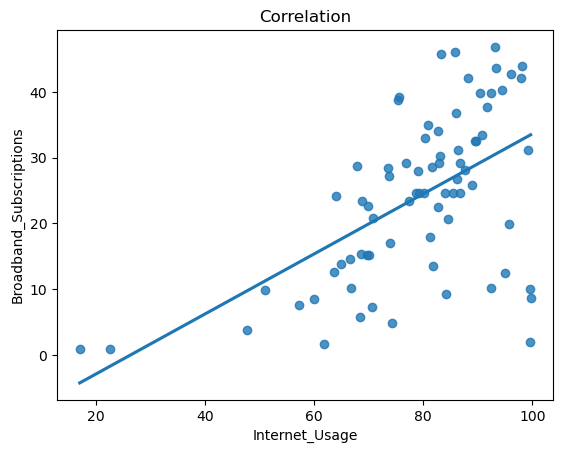

In [17]:
sns.regplot(x = int_broad_2019['Internet_Usage'], y = int_broad_2019['Broadband_Subscriptions'], data = int_broad_2019 , ci = None)
plt.xlabel('Internet_Usage')
plt.ylabel('Broadband_Subscriptions')
plt.title('Correlation')
plt.show()

There exists a positive correlation between Internet Usage and Broadband usage